## Datenanalyse II: Pandas ##

### Series 

Pandas stellt dem Anwender zwei Datenobjekte zur Verfügung, die das Verarbeiten von Vektoren und Matrizen sehr einfach machen: Series und DataFrame. Series ist eine eindimensionale Datenstruktur, die Daten jedes Typs enthalten kann (int, str, float, object usw.). Die Feldinformationen über die Series werden als 'index' bezeichnet und bei der Erzeugung oder danach angegeben:<br/>
s = pd.Series(data, index=index)
<br/>
data kann ein Python dictionary, eine Python Liste, ein numpy array oder ein einzelner Wert (scalar) sein.

In [1]:
%matplotlib inline
#generisches import statement
import pandas as pd

#Erzeugen einer Series, Feldbezeichner werden über index gesetzt
d = [1,2,3,4,5]
s = pd.Series(d, index=["a","b","c","d","e"])
s

a    1
b    2
c    3
d    4
e    5
dtype: int64

In [33]:
#hier werden die Feldbezeichner als keys verwendet
d = dict(a=1,b=2,c=3,d=4,e=5)
s = pd.Series(d)
s

a    1
b    2
c    3
d    4
e    5
dtype: int64

In [34]:
import numpy as np
d = np.array([1,2,3,4,5])
s = pd.Series(d, index=["a","b","c","d","e"])
s

a    1
b    2
c    3
d    4
e    5
dtype: int32

Wie Sie sehen, hat eine Serie immer einen Datentyp. Wenn sie Daten mit verschiedenen Datentypen in eine Serie aufnehmen, versucht die Bibliothek damit intelligent umzugehen:

In [35]:
#kleinster gemeinsamer Nenner = float
a = [3,3.1]
d = pd.Series(a)
d

0    3.0
1    3.1
dtype: float64

In [36]:
#kleinster gemeinsamer Nenner: Objekt
#Achtung - damit sie können sie viele Operationen nicht mehr oder nicht sinnvoll ausführen!
a = ["a",3,4.2]
d = pd.Series(a)
d

0      a
1      3
2    4.2
dtype: object

Noch mehr Metadaten: Sie können die Daten auch insgesamt benamsen. Hier nennen wir sie 'count':

In [37]:
d = [1,2,3,4,5]
s = pd.Series(d, name="count", index=["a","b","c","d","e"])

#### Schreiben und Lesen von Serien

Wir können den Inhalt einer Serie mit der Funktion .to_csv(dateinamen) in eine Datei schreiben. Mit dem keyword 'header' werden auch die Metadaten, in diesem Fall der Inhalt von name, in die Datei geschrieben.  

In [38]:
s.to_csv("series.csv", header=True)

Werfen wir einen Blick in die Datei:

In [39]:
print(open("series.csv").read())

,count
a,1
b,2
c,3
d,4
e,5



Das Lesen von Serien ist nicht ganz intuitiv, da man in pandas einen generischen Befehl für das Lesen von csv-Dateien hat, der normalerweise einen DataFrame zurückgibt und dem man mit squeeze=True sagt, dass das Ergebnis eine Serie ist. Außerdem muss man mit index_col kommunizieren, dass die erste Spalte als Index verwendet werden soll.

In [40]:
d = pd.read_csv("series.csv", squeeze=True, index_col=0)
d

a    1
b    2
c    3
d    4
e    5
Name: count, dtype: int64

Aufgabe

Erzeugen Sie eine Serie mit den Werten 1-20. index = a,b,c usw. Schreiben Sie das Ergebnis in eine Datei und lesen Sie die Datei dann wieder ein.

#### Serien - Daten auswählen

Das Auswählen von Daten (Slicen) funktioniert erst einmal ebenso wie bei numpy, d.h. wir können einfach mit der Position auf die Daten zugreifen:

In [41]:
d[:3]

a    1
b    2
c    3
Name: count, dtype: int64

Außerdem können wir aber auch den Index dafür verwenden:

In [42]:
d["a"]

1

In [43]:
d["a":"c"]

a    1
b    2
c    3
Name: count, dtype: int64

Man kann auch Bedingungen verwenden, um Datenfelder auszuwählen:

In [44]:
d[d > 3]

d    4
e    5
Name: count, dtype: int64

#### Serien verwenden

Serien verhalten sich wie mathematische Vektoren, d.h. man kann sie mit Skalaren (= einfache Zahlen) oder anderen Vektoren, die die gleiche Länge haben, multiplizieren.

In [45]:
#die Metadaten bleiben in der Ausgabe erhalten! 
d * 3

a     3
b     6
c     9
d    12
e    15
Name: count, dtype: int64

In [46]:
#Normalisierung
d / d.sum()

a    0.066667
b    0.133333
c    0.200000
d    0.266667
e    0.333333
Name: count, dtype: float64

In [47]:
#Multiplikation gleichlanger Vektoren
a = pd.Series([2,3,1,5,5])
b = pd.Series([3,2,1,2,3])
a * b

0     6
1     6
2     1
3    10
4    15
dtype: int64

In [48]:
#ACHTUNG
d * a

a   NaN
b   NaN
c   NaN
d   NaN
e   NaN
0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
dtype: float64

In [49]:
#nur die Daten mit den gleichen Metadaten werden wie erwartet verarbeitet
c = pd.Series([2,5,1,3,5],["a","b","c","d","e"])
d * c

a     2
b    10
c     3
d    12
e    25
dtype: int64

In [50]:
d + c

a     3
b     7
c     4
d     7
e    10
dtype: int64

Außerdem können wir die statistischen Methoden aus numpy verwenden oder auch Pandas eigene

In [51]:
print(np.mean(d))
d.mean()

3.0


3.0

### DataFrame

Ein DataFrame ist eine zweidimensionale Datenstruktur mit Spalten, die unterschiedliche Datentypen haben können.

#### DataFrames erstellen

Es mehrere Wege ein DataFrame zu erstellen. 

In [52]:
#aus einem zwei dimensionalen array oder einer vergleichbaren numpy-Datenstruktur
#Zeilen (=index) und Spalten (=columns) Informationen werden dann über entsprechende Parameter gesetzt
data = pd.DataFrame([[2,6,3,4],[3,3,1,7]],index=["text 1", "text 2"], columns=["a","b","c","d"])
data

a  b  c  d
text 1  2  6  3  4
text 2  3  3  1  7

In [53]:
#aus einer Liste von dictionaries
data = pd.DataFrame([dict(a=2,b=6,c=3,d=4),dict(a=2,b=6,c=3,d=4)],index=["text 1", "text 2"])
data

a  b  c  d
text 1  2  6  3  4
text 2  2  6  3  4

In [3]:
import pandas as pd
#1. aus Serien'
a = pd.Series([2,6,3,4],["a", "b", "c", "d"], name="text 1")
b = pd.Series([3,3,1,7],["a", "b", "c", "d"], name="text 2")
c = pd.Series([1,7,2,2],["a", "b", "c", "d"], name="text 3")
data = pd.DataFrame([a,b,c])
data

a  b  c  d
text 1  2  6  3  4
text 2  3  3  1  7
text 3  1  7  2  2

Beim Erstellen des DataFrames aus Serien kann man die besondere Leistungsfähigkeit der Metadaten für seine Zwecke nutzen. Im folgenden haben einige Serien nicht Instanzen aller Felder; achten Sie darauf, wie pandas damit umgeht:

In [4]:
a = pd.Series([2,6,4],["a","c","d"], name="text 1")
b = pd.Series([3,1,7],["a","b","e"], name="text 2")
c = pd.Series([1,7,2,2],["b","c","d","e"], name="text 3")
data = pd.DataFrame([a,b,c])
data

a   b   c   d   e
text 1   2 NaN   6   4 NaN
text 2   3   1 NaN NaN   7
text 3 NaN   1   7   2   2

#### Aufgabe

Tokenisieren Sie 4 beliebige Erzähltexte, zählen Sie die Worte und erzeugen Sie daraus ein DataFrame, dass als Spaltennamen die Worte und als Zeilennamen die Dateinamen (=Textnamen) hat.

#### DataFrames - Daten auswählen

DataFrame kann man als ein Set von Dictionaries ansprechen, deren Daten gleich aufgebaut sind. Ich kann den key zur Auswahl des Dictionaries oder auch zur Erzeugung verwenden. Der key bezieht sich auf den Spaltennamen:

In [56]:
data["a"]

text 1     2
text 2     3
text 3   NaN
Name: a, dtype: float64

Leider haben die Macher von Pandas den Zugriff auf mehrere Zeilen memnotechnisch suboptimal gelöst, er sieht nämlich so aus wie der Zugriff auf die Spalten, nur mit Zahlen. Im folgenden sollen die :

In [57]:
data[1:3]

a  b   c   d  e
text 2   3  1 NaN NaN  7
text 3 NaN  1   7   2  2

Man kann den Aufruf von Spalten- und Zeilenangaben kombinieren: 

In [58]:
data["b"][:1]

text 1   NaN
Name: b, dtype: float64

DataFrame stellt  allerdings außerdem eine sehr mächtige Syntax zum Auswahl der Daten zur Verfügung. Hier funktioniert der Zugriff über spezifische Attribute der Objekte Series bzw. DataFrame:<br/>
df.loc[sel] -  wählt Zeilen und Spalten über ihren Namen aus. Wird der Name nicht gefunden, gibt es einen Fehler. <br/> 
df.iloc[sel] - wählt Zeilen und Spalten über die Position (als Zahl) aus.<br/>
df.ix[sel] - unterstützt beide Zugriffsweisen: wenn das Label nicht vorhanden ist, wird angenommen, dass es sich um eine Position handelt. <br/>
sel - ist das Auswahlkriterium. Es können Einzelwerte, Slices oder auch Listen übergeben werden. Achtung: Im fall von loc wird auch der Endwert in die ausgewählten Daten eingeschlossen! Funktioniert also anders als Python-Arrays. iloc dagegen funktioniert wie Arrays.<br/>
Die Syntax von sel bei DataFrames: [row,column]. Lässt man die Angaben zu row oder column weg, wird angenommen, sie lautet :
<br/>
Die Rückgabewerte dieser ganzen Operationen sind entweder Serien oder DataFrames



In [59]:
data.loc["text 1","a"]

2.0

In [60]:
data.loc["text 1","a":"e"]

a     2
b   NaN
c     6
d     4
e   NaN
Name: text 1, dtype: float64

In [5]:
#hier muss man den Doppelpunkt setzen!
data.loc[:,"a":"d"]

a   b   c   d
text 1   2 NaN   6   4
text 2   3   1 NaN NaN
text 3 NaN   1   7   2

In [62]:
data[:,0]

TypeError: unhashable type: 'slice'

In [63]:
data.shape

(3, 5)

In [64]:
data.iloc[:,0]

text 1     2
text 2     3
text 3   NaN
Name: a, dtype: float64

In [65]:
data.iloc[2]

a   NaN
b     1
c     7
d     2
e     2
Name: text 3, dtype: float64

In [66]:
data.iloc[1:3,2:3]

c
text 2 NaN
text 3   7

In [67]:
#Auswahl mittels Positionsindex sowie durch range : und Position
data.ix[:,2]

text 1     6
text 2   NaN
text 3     7
Name: c, dtype: float64

In [68]:
#Auswahl durch Listen
data.ix[[0,2],["a","d"]]

a  d
text 1   2  4
text 3 NaN  2

#### Aufgaben

Erzeugen Sei folgendes Dataframe: 3 Zeilen (label: text 1, usw) sowie 7 Spalten (labels a, b, usw) mit beliebigen Werten. Selektieren Sie nun: <br/>
<ul>
<li>den ersten Eintrag in der ersten Spalte.</li>
<li>alle Einträge von text 1</li>
<li>die Einträge von text 2 in den Spalten b, d</li>
</ul>

#### Weitere Verwendungsweisen

Aber noch einmal zurück zu den Spalten. Wenn man Daten Spalten zuweist, die es noch nicht gibt, werden diese eingerichtet. Achten Sie darauf, wie Pandas NaN-Felder einfach ignoriert:

In [69]:
data["a Quadrat"] = data["a"]**2
data

a   b   c   d   e  a Quadrat
text 1   2 NaN   6   4 NaN          4
text 2   3   1 NaN NaN   7          9
text 3 NaN   1   7   2   2        NaN

Wenn der Name der Spalte ein gültiger Pythonidentifier ist, kann man ihn übrigens direkt verwenden. Im folgenden adressieren wir die Spalte, die den Namen 'a' hat => data["a"] 

In [70]:
data.a

text 1     2
text 2     3
text 3   NaN
Name: a, dtype: float64

In [71]:
data[data>3]

a   b   c   d   e  a Quadrat
text 1 NaN NaN   6   4 NaN          4
text 2 NaN NaN NaN NaN   7          9
text 3 NaN NaN   7 NaN NaN        NaN

#### Mit DataFrames arbeiten 

Wenn wir mit DataFrames arbeiten, müssen wir uns wieder die Axen-Orientierung vor Augen halten, die wir schon aus numpy kennen: <img src="files/images/numpy_array.png" width=400/> 

Wenn wir Methoden und Funktionen broadcasten (funktioniert mit den pandas eigenen Methoden sowie mit numpy Methoden), müssen wir die Achsenorientierung beachten. Der Default-Wert ist zumeist axis=0:

In [72]:
data

a   b   c   d   e  a Quadrat
text 1   2 NaN   6   4 NaN          4
text 2   3   1 NaN NaN   7          9
text 3 NaN   1   7   2   2        NaN

In [73]:
#identisch mit data.mean(axis=0)
data.mean()

a            2.5
b            1.0
c            6.5
d            3.0
e            4.5
a Quadrat    6.5
dtype: float64

In [74]:
data.mean(axis=1)

text 1    4
text 2    5
text 3    3
dtype: float64

In [75]:
data["a"].mean()

2.5

In [76]:
data.loc["text 2"].mean()

5.0

Oft ist es sinnvoll, fehlende Werte durch einen Wert zu ersetzen, z.B. 0 (man kann auch einen beliebigen anderen Wert nehmen, der sinnvoll ist):

In [77]:
data = data.fillna(0)
data

a  b  c  d  e  a Quadrat
text 1  2  0  6  4  0          4
text 2  3  1  0  0  7          9
text 3  0  1  7  2  2          0

#### Löschen von Daten

In [78]:
data = data.drop("a Quadrat", axis=1)
data

a  b  c  d  e
text 1  2  0  6  4  0
text 2  3  1  0  0  7
text 3  0  1  7  2  2

Broadcasting ist ausgesprochen mächtig und erlaubt es komplexe Vorgänge sehr kompakt auszudrücken. Wenn wir unsere Daten standardisieren wollen, d.h. sie sollen den Mittelwert 0 haben und eine Standardabweichung von 1, dann muss man von jedem Datenpunkt den Mittelwert abziehen und das Ergebnis durch die Standardabweichung teilen. Das kann man nun so ausdrücken: 

In [79]:
(data - data.mean()) / data.std()

a         b         c  d        e
text 1  0.218218 -1.154701  0.440225  1 -0.83205
text 2  0.872872  0.577350 -1.144586 -1  1.10940
text 3 -1.091089  0.577350  0.704361  0 -0.27735

Man kann sich die wichtigsten statistischen Beschreibungen für Daten ausgeben lassen (geht auch für Serien):

In [80]:
data.describe()

a         b         c  d         e
count  3.000000  3.000000  3.000000  3  3.000000
mean   1.666667  0.666667  4.333333  2  3.000000
std    1.527525  0.577350  3.785939  2  3.605551
min    0.000000  0.000000  0.000000  0  0.000000
25%    1.000000  0.500000  3.000000  1  1.000000
50%    2.000000  1.000000  6.000000  2  2.000000
75%    2.500000  1.000000  6.500000  3  4.500000
max    3.000000  1.000000  7.000000  4  7.000000

#### DataFrames speichern und lesen

In [81]:
data.to_csv("df.csv")

In [82]:
print(open("df.csv").read())

,a,b,c,d,e
text 1,2.0,0.0,6.0,4.0,0.0
text 2,3.0,1.0,0.0,0.0,7.0
text 3,0.0,1.0,7.0,2.0,2.0



In [83]:
data = pd.read_csv("df.csv", index_col=0)
data

a  b  c  d  e
text 1  2  0  6  4  0
text 2  3  1  0  0  7
text 3  0  1  7  2  2

### Serien und DataFrames sortieren 

In Serien und DataFrames kann man entweder die Daten oder den Index sortieren. Beginnen wir mit Serien und dem Sortieren von Daten. Voreingestellt ist das Sortieren innerhalb der gleichen Datenstruktur, d.h. es gibt keine Rückgabe, vielmehr wird die ursprüngliche Serie modifiziert. Verwendet wird das besonders bei großen Datenmengen sehr effektive quicksort, aber Sie können den Algorithmus selbst setzen. Außerdem können Sie bestimmen, ob aufsteigend sortiert werden soll oder nicht.

In [84]:
import pandas as pd
s = pd.Series([3,1,6,2,8,3])
s.sort()
s

1    1
3    2
0    3
5    3
2    6
4    8
dtype: int64

In [85]:
s.sort(ascending=False, kind="mergesort")
s

4    8
2    6
5    3
0    3
3    2
1    1
dtype: int64

Wenn wir wollen, dass eine neue Serie zurückgegeben wird, können wir ordered verwenden. Das ist besonders nützlich, wenn wir den Output gleich an eine andere Methode weiterreichen wollen.

In [86]:
s.order()

1    1
3    2
5    3
0    3
2    6
4    8
dtype: int64

Mit der Methode s.head(n) können wir uns die ersten n Werte der Serie ausgeben lassen:

In [87]:
s.order().head(4)

1    1
3    2
5    3
0    3
dtype: int64

Falls es nur darum geht, die n größten oder kleinsten Werte zu erhalten, müssen wir die Serie gar nicht sortieren, sondern können die Methoden s.nsmallest(n) oder s.slargest(n) verwenden:

In [88]:
s.nlargest(4)

4    8
2    6
5    3
0    3
dtype: int64

Mit der Methode sort_index können wir den Index sortieren. Hier wird immer die sortierte Serie als Ergebnis zurückgegeben. Wir können ebenfalls das keyword 'ascending' verwenden. 

In [89]:
s.sort_index()

0    3
1    1
2    6
3    2
4    8
5    3
dtype: int64

Diese Methode können wir auch mit DataFrames verwenden, um nach Zeilen- und Spaltenlabels sortieren zu lassen. Voreingestellt ist das Sortieren der Zeilenlabels (index). Erst einmal brauchen wir ein Dataframe:

In [22]:
data = pd.read_csv("df1.csv", index_col=0)
data

a  b  c  d  e
xx  3  1  4  5  1
yy  5  2  2  5  1
zz  1  2  1  1  2
ww  3  2  1  5  1

Jetzt sortieren wir es aufgrund des Index (Achtung: Hier wird nicht inplace sortiert, sondern ein neuer DataFrame zurückgegeben):

In [23]:
data.sort_index()

a  b  c  d  e
ww  3  2  1  5  1
xx  3  1  4  5  1
yy  5  2  2  5  1
zz  1  2  1  1  2

Durch das Hinzufügen der Axeninformation können wir die Spaltennamen sortieren:

In [24]:
data.sort_index(axis=1, ascending=False)

e  d  c  b  a
xx  1  5  4  1  3
yy  1  5  2  2  5
zz  2  1  1  2  1
ww  1  5  1  2  3

Wir können eine Tabelle auch nach den Werten einer Spalte sortieren lassen. Dazu dient die Methode sort_values. 

In [25]:
print(data)
data.sort_values(by="a")

    a  b  c  d  e
xx  3  1  4  5  1
yy  5  2  2  5  1
zz  1  2  1  1  2
ww  3  2  1  5  1


a  b  c  d  e
zz  1  2  1  1  2
xx  3  1  4  5  1
ww  3  2  1  5  1
yy  5  2  2  5  1

Sie können auch mehrere Spalten als Schlüssel verwenden, dann wird bei gleichen Werten in der ersten Spalte nach den Werten in der zweiten Spalte sortiert:

In [26]:
data.sort_values(by=["e","c"])

a  b  c  d  e
ww  3  2  1  5  1
yy  5  2  2  5  1
xx  3  1  4  5  1
zz  1  2  1  1  2

In [27]:
pd.DataFrame(data, index=["yy","ww","zz","xx"])

a  b  c  d  e
yy  5  2  2  5  1
ww  3  2  1  5  1
zz  1  2  1  1  2
xx  3  1  4  5  1

In [28]:
print(data)
data.iloc[0]

    a  b  c  d  e
xx  3  1  4  5  1
yy  5  2  2  5  1
zz  1  2  1  1  2
ww  3  2  1  5  1


a    3
b    1
c    4
d    5
e    1
Name: xx, dtype: int64

In [29]:
data.sum(axis=1)

xx    14
yy    15
zz     7
ww    12
dtype: int64

In [30]:
#Shows 

In [31]:
data.sum(axis=1).argsort()

xx    2
yy    3
zz    0
ww    1
dtype: int64

In [41]:
data.loc[data.sum(axis=1).sort_values(inplace=False, ascending=False).index]

a  b  c  d  e
yy  5  2  2  5  1
xx  3  1  4  5  1
ww  3  2  1  5  1
zz  1  2  1  1  2

In [35]:
data

a  b  c  d  e
xx  3  1  4  5  1
yy  5  2  2  5  1
zz  1  2  1  1  2
ww  3  2  1  5  1

# Gruppen bilden: Group by

In [2]:
df = pd.DataFrame({
        'nationality': ["usa", "usa", "usa", "usa", "germany", "germany", "germany", "germany"],
        'gender':["m","f","f","m","f","m","m","f"],
        'height':[183, 156,177,177,168,192,185,171],
        'weight':[93, 56, 66, 75, 50, 102, 91, 68]
    })
df

gender  height nationality  weight
0      m     183         usa      93
1      f     156         usa      56
2      f     177         usa      66
3      m     177         usa      75
4      f     168     germany      50
5      m     192     germany     102
6      m     185     germany      91
7      f     171     germany      68

In [3]:
print("Average height: {} cm\nAverage weight: {} kg".format(df["height"].mean(), df["weight"].mean()))


Average height: 176.125 cm
Average weight: 75.125 kg


In [4]:
df.groupby("gender").mean()

height  weight
gender                
f       168.00   60.00
m       184.25   90.25

In [5]:
df.groupby("nationality").mean()

height  weight
nationality                
germany      179.00   77.75
usa          173.25   72.50

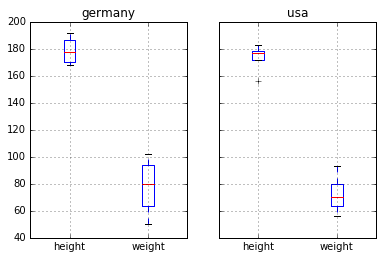

In [8]:
gendered = df.groupby("nationality")
gendered.boxplot(return_type='dict')
from matplotlib import pyplot as plt
plt.show()

# Durch Gruppen iterieren

In [18]:
gender = df.groupby("gender")
for group_name, group_data in gender:
    print(group_name)
    print(group_data)
    print("---")

f
  gender  height nationality  weight
1      f     156         usa      56
2      f     177         usa      66
4      f     168     germany      50
7      f     171     germany      68
---
m
  gender  height nationality  weight
0      m     183         usa      93
3      m     177         usa      75
5      m     192     germany     102
6      m     185     germany      91
---


# Eine einzelne Gruppe herausgreifen

In [19]:
gender.get_group("f")

gender  height nationality  weight
1      f     156         usa      56
2      f     177         usa      66
4      f     168     germany      50
7      f     171     germany      68

### Merging two Dataframes

Wir haben zwei Dataframes, die eine gemeinsame Spalte haben:

In [12]:
i1 = pd.Series(["a","b","c","d","g"], name="stadt")
i2 = pd.Series([3,5.5,22,2, 12], name="land")
d1 = pd.DataFrame([i1, i2])
d1 = d1.T
d1

stadt land
0     a    3
1     b  5.5
2     c   22
3     d    2
4     g   12

In [13]:
i1 = pd.Series(["a","b","c","d", "e", "f"], name="stadt")
i2 = pd.Series(["ich","du", "er", "sie", "uns", "wir"], name="pros")
d2 = pd.DataFrame([i1, i2])
d2 = d2.T
d2


stadt pros
0     a  ich
1     b   du
2     c   er
3     d  sie
4     e  uns
5     f  wir

In [14]:
pd.merge(d1, d2, on="stadt", how="inner")

stadt land pros
0     a    3  ich
1     b  5.5   du
2     c   22   er
3     d    2  sie

In [15]:
pd.merge(d1, d2, on="stadt", how="outer")

stadt land pros
0     a    3  ich
1     b  5.5   du
2     c   22   er
3     d    2  sie
4     g   12  NaN
5     e  NaN  uns
6     f  NaN  wir

In [16]:
pd.merge(d1, d2, on="stadt", how="left")

stadt land pros
0     a    3  ich
1     b  5.5   du
2     c   22   er
3     d    2  sie
4     g   12  NaN

[to do:
 - Sortieren: Umgang mit fehlenden Daten
 - group by
]

### Literatur

Neben den Tutorials in der Pandas-Dokumentation kann ich diese Video empfehlen, das besonders für diejenigen interessant sein wird, die sich schon ganz gut mit SQL auskennen: <a href="https://www.youtube.com/watch?v=1uVWjdAbgBg">Greg Reda - Translating SQL to pandas. And back</a><br/>
<a href="https://drive.google.com/folderview?id=0ByIrJAE4KMTtaGhRcXkxNHhmY2M&usp=sharing">Pandas Cheat Sheet</a> by Marc Graph